## Larger Example 
### Multiclass Classification
> Classify images of different items of clothing

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [2]:
from tensorflow.keras.datasets import fashion_mnist

# data has already been sorted into training and test sets

In [3]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

Familiarising with the dataset

In [4]:
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [5]:
# Shape of training data
train_data.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [6]:
# Shape of testing data
test_data.shape, test_labels.shape

((10000, 28, 28), (10000,))

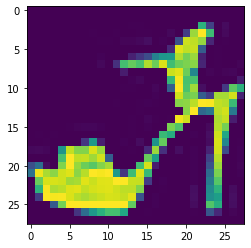

In [7]:
# Plot a single sample
import matplotlib.pylab as plt
plt.imshow(train_data[9])

In [8]:
# Creating a small list, so the index of the training labels are human readable

label_names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

len(label_names) # More than 2 - MultiClass Classification Problem

10

Text(0.5, 1.0, 'Coat')

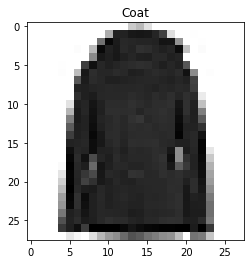

In [9]:
index_of_choice = 2000
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(label_names[train_labels[index_of_choice]])

In [10]:
# Building the model for Multiclass Classification
tf.random.set_seed(69)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# SparseCategoricalCrossentropy, when the labels are discrete, [1, 2, 3, 4]
# CategoricalCrossentropy, when the labels are 1 Hot Encoded, [[0, 0, 1], [0, 1, 0], [1, 0, 0], [1, 1, 1]]
# If using CatergoricalCrossentropy the labels have to be one_hot encoding
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

history = model.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.7182 - accuracy: 0.0990 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0974 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3027 - accuracy: 0.0998 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3027 - accuracy: 0.0981 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3030 - accuracy: 0.0986 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3027 - accuracy: 0.0984 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3036 - accuracy: 0.0996 - val_loss: 2.3026 - val_accuracy:

<AxesSubplot:>

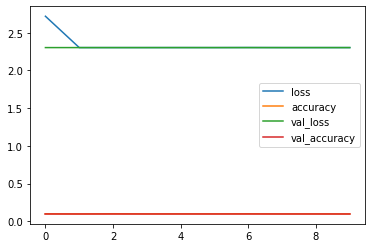

In [11]:
import pandas as pd
pd.DataFrame(history.history).plot()

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Getting the Data ready for modelling
>* i) Converting all the data to numbers.
>* ii) Cross-checking all tensors are in the Right Shape.
>* iii) Normalize or Standardize (Neural Networks works better with Normalization)

Normalization:
>>* Scaling the data to the range of 0 - 1.
>>* Also called Min-Max Scaling. 
>>* Data/Data.max()
>>* When the data doesn't follow Gaussian Distr

Standardization:
>>* Scales the values to be centered around the mean, and unit standard deviation
>>* (data-mean)/SD
>>* When data follows Gaussian Distr

In [13]:
#The min and max of data

train_data.min(), train_data.max()

(0, 255)

In [14]:
# Normalization of data
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

In [15]:
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [16]:
tf.random.set_seed(69)

model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model2.compile(loss = 'SparseCategoricalCrossentropy', optimizer = 'Adam', metrics=['accuracy'])

history2 = model2.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0829 - accuracy: 0.5921 - val_loss: 0.7675 - val_accuracy: 0.7104
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7086 - accuracy: 0.7429 - val_loss: 0.7128 - val_accuracy: 0.7411
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6636 - accuracy: 0.7633 - val_loss: 0.6811 - val_accuracy: 0.7629
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6427 - accuracy: 0.7733 - val_loss: 0.6932 - val_accuracy: 0.7528
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6328 - accuracy: 0.7756 - val_loss: 0.6592 - val_accuracy: 0.7715
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6244 - accuracy: 0.7785 - val_loss: 0.6609 - val_accuracy: 0.7664
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6180 - accuracy: 0.7819 - val_loss: 0.6513 - val_accuracy:

<AxesSubplot:>

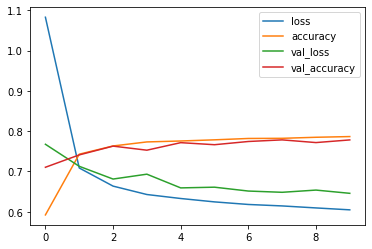

In [17]:
import pandas as pd
pd.DataFrame(history2.history).plot()

Improving the model by finding the ideal learning rate. 

In [18]:
tf.random.set_seed(69)

# Create a Model
model3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

# Compile a Model
model3.compile(loss="SparseCategoricalCrossentropy",optimizer = "Adam", metrics=["accuracy"])

# Learning Rate Callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch/20))

# Fit the Model
history3 = model3.fit(train_data_norm, 
                      train_labels, 
                      epochs=50, 
                      validation_data = (test_data_norm, test_labels),
                      callbacks = [lr_scheduler])

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0829 - accuracy: 0.5921 - val_loss: 0.7675 - val_accuracy: 0.7104 - lr: 0.0010
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7071 - accuracy: 0.7439 - val_loss: 0.7136 - val_accuracy: 0.7399 - lr: 0.0011
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6618 - accuracy: 0.7646 - val_loss: 0.6812 - val_accuracy: 0.7650 - lr: 0.0013
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6426 - accuracy: 0.7730 - val_loss: 0.6859 - val_accuracy: 0.7569 - lr: 0.0014
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6337 - accuracy: 0.7755 - val_loss: 0.6660 - val_accuracy: 0.7669 - lr: 0.0016
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6281 - accuracy: 0.7764 - val_loss: 0.6583 - val_accuracy: 0.7686 - lr: 0.0018
Epoch 7/50
1875/1875 [==============================] - 4s

<AxesSubplot:title={'center':'Without Learning Rate'}>

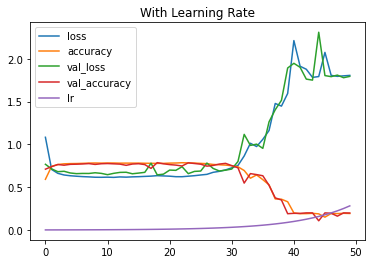

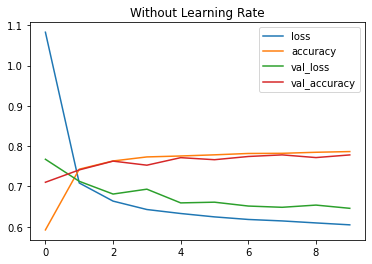

In [19]:
pd.DataFrame(history3.history).plot(title = "With Learning Rate")
pd.DataFrame(history2.history).plot(title = "Without Learning Rate")

Text(0.5, 1.0, 'Ideal Learning Rate')

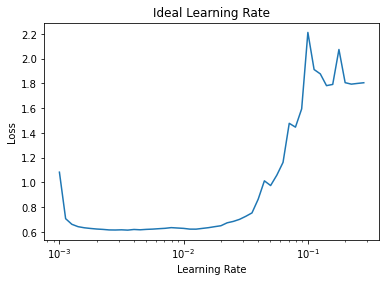

In [20]:
# Plot the learning rate decay curve

import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(50)/20))
plt.semilogx(lrs, history3.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Ideal Learning Rate")

The Ideal Learning Rate for a model is the just the point before the lowest point on the Learning Rate vs. Loss. (Approximation is allowed)

In this case,
the lowest point is between 1e-3 and 1e-2
therefore, the ILR shall be, 1e-3

* 1e-3 happens to be the default LR in Adam() optimizer

In [21]:
# Refit the model with the ILR

# Set Seed
tf.random.set_seed(69)

# Create Model
model4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

# Compile Model
# LR = 0.001 default to Adam()
model4.compile(optimizer="Adam", loss="SparseCategoricalCrossentropy", metrics=['accuracy'])

# Fit Model
history4 = model4.fit(train_data_norm, train_labels, epochs=50, validation_data=(test_data_norm, test_labels))


Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0829 - accuracy: 0.5921 - val_loss: 0.7675 - val_accuracy: 0.7104
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7086 - accuracy: 0.7429 - val_loss: 0.7128 - val_accuracy: 0.7411
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6636 - accuracy: 0.7633 - val_loss: 0.6811 - val_accuracy: 0.7629
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6427 - accuracy: 0.7733 - val_loss: 0.6932 - val_accuracy: 0.7528
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6328 - accuracy: 0.7756 - val_loss: 0.6592 - val_accuracy: 0.7715
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6244 - accuracy: 0.7785 - val_loss: 0.6609 - val_accuracy: 0.7664
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6180 - accuracy: 0.7819 - val_loss: 0.6513 - val_accuracy:

<AxesSubplot:>

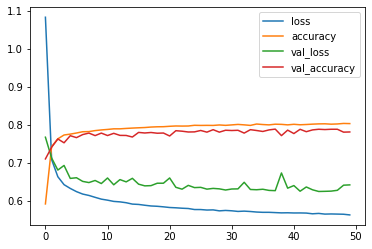

In [22]:
pd.DataFrame(history4.history).plot()

Evaluation
>>* Confusion Matrix
>>* Assess it's predictions (Through Visualization)

In [23]:
# Building a confusion matrix

# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 

import itertools
from sklearn.metrics import confusion_matrix

def make_CM(y_true, y_preds, classes=None, figsize=(10, 10), text_size = 15):
# Create the confusion matrix
    cm = confusion_matrix(y_true, y_preds)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0]

    # Let's prettify it
    fig, ax = plt.subplots(figsize=figsize)
    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
    fig.colorbar(cax)

    # Set Labels to be Classes
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

    # Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.xaxis.label.set_size(text_size)
    ax.yaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # Set threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [24]:
label_names

['T-shirt',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle Boot']

In [25]:
# Making predictions with the model

y_probs = model4.predict(test_data_norm)
y_true = test_labels


In [26]:
y_pred = y_probs.argmax(axis=1)

In [27]:
y_true, y_pred

(array([9, 2, 1, ..., 8, 1, 5], dtype=uint8),
 array([5, 2, 1, ..., 4, 1, 5], dtype=int64))

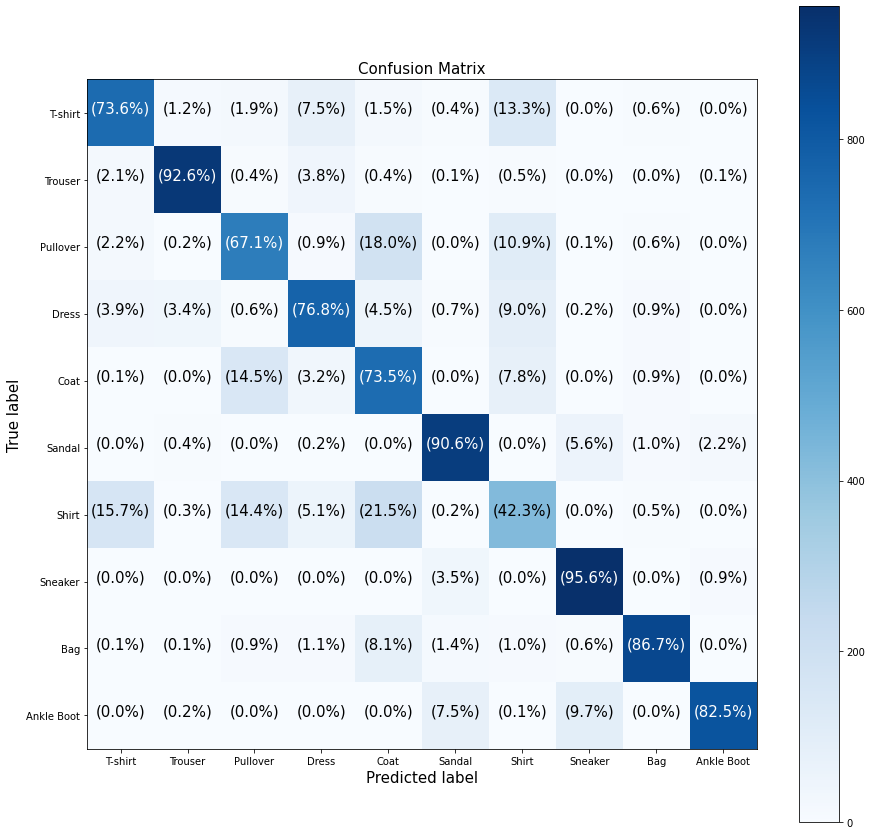

In [28]:
# Make CM

make_CM(y_preds=y_pred, y_true=y_true, classes=label_names, figsize=(15, 15))